1) 2014년~2019년 월별 응급실 이용자 수

In [263]:
# 데이터프레임 생성
import pandas as pd

er_month = pd.read_csv('c:\\data\\er_month.csv', encoding='cp949')

er_sum = er_month[(er_month.연령별 == '합계') & (er_month.성별 == '계')]
er_sum = pd.concat([er_sum.기간, er_sum[er_sum.columns[4:]]], axis=1) 
er_sum.columns = ['year', '01월', '02월', '03월', '04월', '05월', '06월', '07월', '08월', '09월', '10월', '11월', '12월']

er_melt = pd.melt(er_sum, id_vars=['year'], value_vars=er_sum.columns[1:], var_name='month', value_name='use_num')
er_melt = er_melt.sort_values(['year', 'month'], ascending=True)
er_melt.reset_index(drop=True, inplace=True)

er_melt['year'] = er_melt['year'].astype(str)
er_melt['period'] = er_melt['year'] +'년 '+ er_melt['month']
er_melt['use_num'].replace(',', '', regex=True, inplace=True)
er_melt['use_num'] = er_melt['use_num'].astype(int)

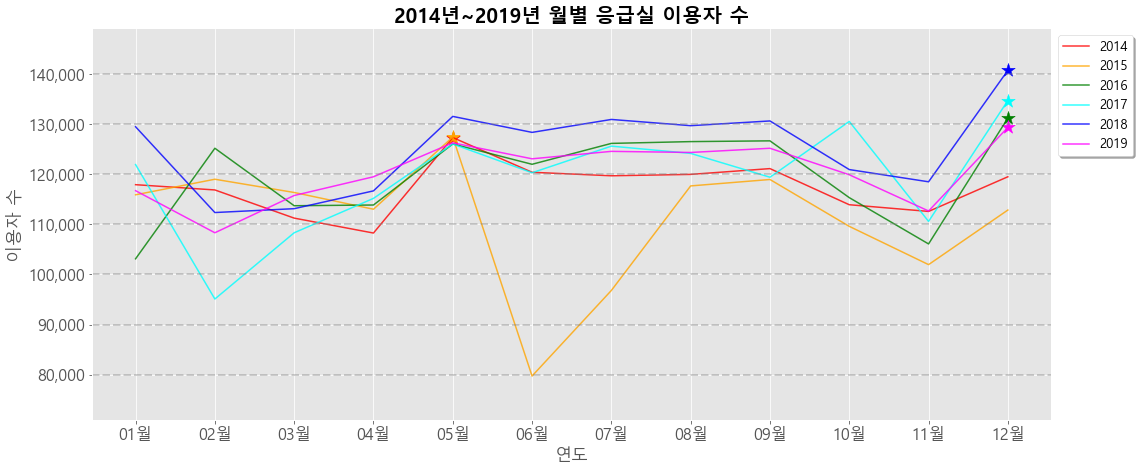

In [219]:
# 그래프 생성
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import font_manager, rc

font = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font)

year = list(range(2014, 2020, 1))
years = list(map(str, year))
colors = ['red', 'orange', 'green', 'aqua', 'blue', 'magenta']

fig, ax = plt.subplots(figsize=(14, 6))
fig.tight_layout()
fig.set_facecolor('white')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for i in range(len(years)):
    plt.plot('month', 'use_num', data=er_melt[er_melt.year==years[i]], label=years[i], color=colors[i], alpha=0.8)
    er_max = er_melt['use_num'][er_melt.year==years[i]].max()
    plt.scatter('month', 'use_num', data=er_melt[(er_melt.year==years[i])&(er_melt.use_num==er_max)], marker='*', s=200, color=colors[i], label=None)

yticks = list(ax.get_yticks())  # y축 눈금을 가져온다.
for y in yticks:
    ax.axhline(y,linestyle=(0,(5,2)),color='grey',alpha=0.5)  # 눈금선 생성    
    
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(er_melt['month'].unique(), fontsize=16)
ax.set_yticks(ax.get_yticks().tolist()) 
ax.set_yticklabels(range(70000, 180000, 10000), fontsize=16) 
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.ylim(71000, 149000)

plt.xlabel('연도', fontsize=17)
plt.ylabel('이용자 수', fontsize=17)
plt.title('2014년~2019년 월별 응급실 이용자 수', fontsize=20, fontweight='bold')

plt.legend(loc='best', bbox_to_anchor=(1,1), facecolor='white', framealpha=1, fontsize=13, shadow=True)
plt.show()

2)  2014년~2019년 월별 응급실 이용자 수 합계

In [264]:
# 데이터프레임 생성
er_melt = pd.melt(er_sum, id_vars=['year'], value_vars=er_sum.columns[1:], var_name='month', value_name='use_num')
er_melt['use_num'].replace(',', '', regex=True, inplace=True)
er_melt['use_num'] = er_melt['use_num'].astype(int)
er_melt = er_melt.groupby('month').sum()['use_num'].reset_index()

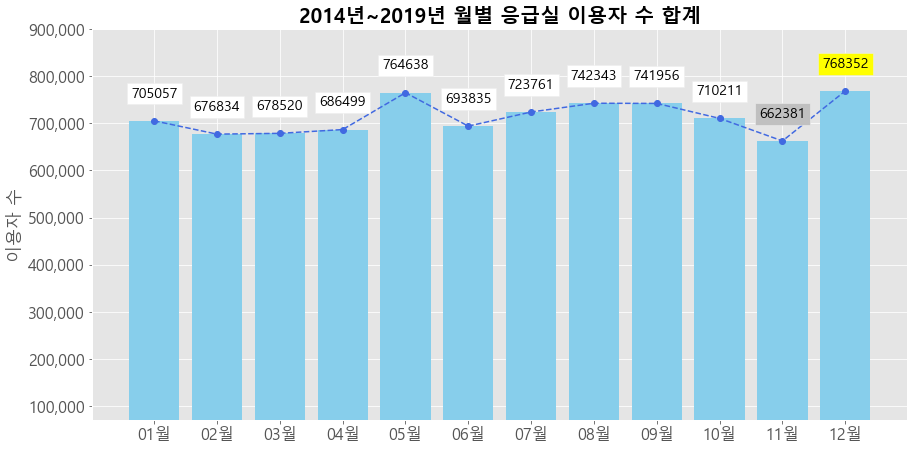

In [265]:
# 그래프 생성
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import font_manager, rc

font = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font)

fig, ax = plt.subplots(figsize=(12, 6))
fig.tight_layout()

plt.bar('month', 'use_num', data=er_melt, label='이용자 수', color='skyblue', alpha=1)
line_plot = ax.plot('month', 'use_num', data=er_melt, label='', color='royalblue', linestyle='--', marker='o')  # 선 그래프 출력

for coord in list(line_plot[0].get_xydata()):
    if coord[1] == er_melt['use_num'].max():
        bbox = dict(boxstyle='square', facecolor='yellow')
    elif coord[1] == er_melt['use_num'].min():
        bbox = dict(boxstyle='square', facecolor='silver')
    else: 
        bbox = dict(boxstyle='square', facecolor='white')
        
    ax.text(coord[0], coord[1]+50000, f'{int(coord[1])}', fontsize=14, ha='center', bbox=bbox)  # 선 그래프 텍스트
 
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(er_melt['month'].unique(), fontsize=16)
ax.set_yticks(ax.get_yticks().tolist()) 
ax.set_yticklabels(range(70000, 1100000, 110000), fontsize=16) 
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.ylim(71000, 900000)

plt.ylabel('이용자 수', fontsize=17)
plt.title('2014년~2019년 월별 응급실 이용자 수 합계', fontsize=20, fontweight='bold')

plt.style.use('ggplot')
plt.show()

3) 2014년~2019년 요일별 응급실 이용자 수 합계

In [247]:
# 데이터프레임 생성
import pandas as pd

er_day = pd.read_csv('c:\\data\\er_day.csv', encoding='cp949')
er_sum = er_day[(er_day.연령별 == '합계') & (er_day.성별 == '계')]
er_sum = pd.concat([er_sum.기간, er_sum[er_sum.columns[4:]]], axis=1)
er_sum = er_sum.rename(columns={'기간':'year'})

er_melt = pd.melt(er_sum, id_vars=['year'], value_vars=er_sum.columns[1:], var_name='day', value_name='use_num')
er_melt['use_num'].replace(',', '', regex=True, inplace=True)
er_melt['use_num'] = er_melt['use_num'].astype(int)
er_melt = er_melt.groupby('day').sum()['use_num'].reset_index()

day_to_num = {
    '월요일' : 0,
    '화요일' : 1,
    '수요일' : 2,
    '목요일' : 3,
    '금요일' : 4,
    '토요일' : 5,
    '일요일' : 6
}
er_melt['day_num'] = er_melt['day'].apply(lambda x: day_to_num[x])
er_sort = er_melt.sort_values('day_num')
er_sort = er_sort[['day', 'use_num']]

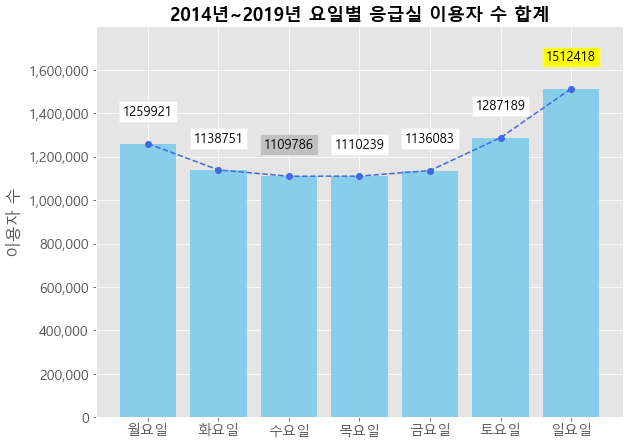

In [379]:
# 그래프 생성
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import font_manager, rc

font = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font)

fig, ax = plt.subplots(figsize=(8, 6))
fig.tight_layout()

plt.bar('day', 'use_num', data=er_sort, label='이용자 수', color='skyblue', alpha=1)
line_plot = ax.plot('day', 'use_num', data=er_sort, label='', color='royalblue', linestyle='--', marker='o')  # 선 그래프 출력


for coord in list(line_plot[0].get_xydata()):
    if coord[1] == er_sort['use_num'].max():
        bbox = dict(boxstyle='square', facecolor='yellow')
    elif coord[1] == er_sort['use_num'].min():
        bbox = dict(boxstyle='square', facecolor='silver')
    else: 
        bbox = dict(boxstyle='square', facecolor='white')
        
    ax.text(coord[0], coord[1]+130000, f'{int(coord[1])}', fontsize=13, ha='center', bbox=bbox)  # 선 그래프 텍스트
 
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(er_sort['day'].unique(), fontsize=14)
ax.set_yticks(ax.get_yticks().tolist()) 
ax.set_yticklabels(range(0, 16000000, 1800000), fontsize=14) 
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.ylim(0, 1800000)

plt.ylabel('이용자 수', fontsize=16)
plt.title('2014년~2019년 요일별 응급실 이용자 수 합계', fontsize=18, fontweight='bold')

plt.style.use('ggplot')
plt.show()

4) 연령에 따른 요일별 응급실 이용자 수 차이

In [205]:
# 데이터프레임 생성
import pandas as pd

er_day = pd.read_csv('c:\\data\\er_day.csv', encoding='cp949')
er_day['연령별'].replace('1 - 9세', '01 - 09세', inplace=True)
er_day['연령별'].replace('1세미만', '00 - 01세', inplace=True)

er_sum = er_day[(~er_day.연령별.isin(['합계', '연령미상'])) & (er_day.성별 == '계')]
er_sum = pd.concat([er_sum[er_sum.columns[:2]], er_sum[er_sum.columns[4:]]], axis=1)

er_melt = pd.melt(er_sum, id_vars=['기간', '연령별'], value_vars=er_sum.columns[2:], var_name='day', value_name='use_num')
er_melt['use_num'].replace(',', '', regex=True, inplace=True)
er_melt['use_num'] = er_melt['use_num'].astype(int)

er_group = er_melt.groupby(['연령별', 'day']).sum()['use_num'].reset_index()
er_group['rank'] = er_group.groupby(['연령별'])['use_num'].rank(ascending=False).astype(int)
er_group.sort_values(['연령별', 'rank'], inplace=True)

er_rank1 = er_group[er_group['rank']==1]

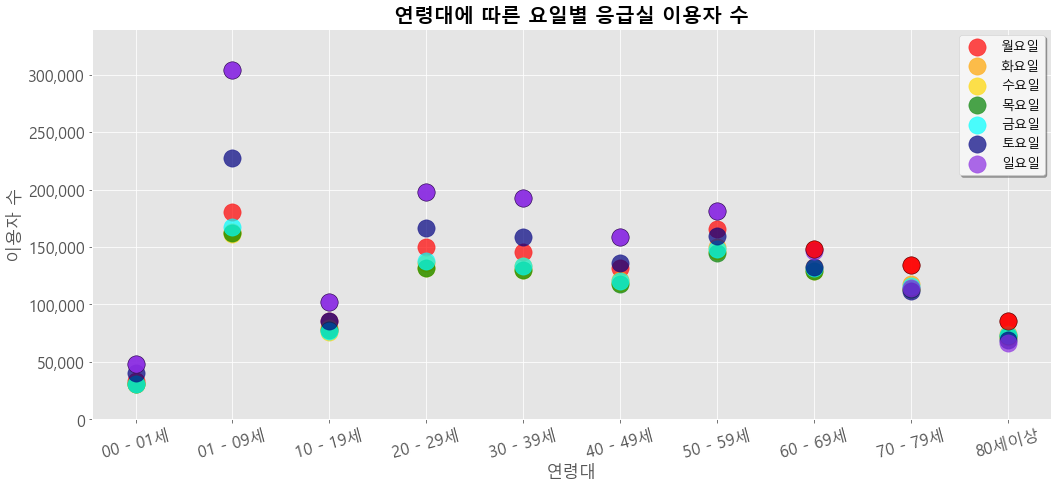

In [206]:
# 그래프 생성
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import font_manager, rc

font = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font)

day_list = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
colors = ['red', 'orange', 'gold', 'green', 'aqua', 'navy', 'blueviolet']

fig, ax = plt.subplots(figsize=(14, 6))
fig.tight_layout()

for i in range(len(day_list)):
    plt.scatter('연령별', 'use_num', data=er_group[er_group.day==day_list[i]], label=day_list[i], s=300, color=colors[i], alpha=0.7)

for i in range(len(day_list)):
    plt.scatter('연령별', 'use_num', data=er_rank1[er_rank1.day==day_list[i]], label=None, s=300, color=colors[i], edgecolor='black', alpha=0.8)    

ax.set_xticks(ax.get_xticks())    
ax.set_xticklabels(er_group['연령별'].unique(), fontsize=16, rotation=15)
ax.set_yticks(ax.get_yticks().tolist()) 
ax.set_yticklabels(range(0, 400000, 50000), fontsize=16) 
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.ylim(0, 340000)

plt.xlabel('연령대', fontsize=17)
plt.ylabel('이용자 수', fontsize=17)
plt.title('연령대에 따른 요일별 응급실 이용자 수', fontsize=20, fontweight='bold')

plt.legend(loc='best', bbox_to_anchor=(1, 1), facecolor='whitesmoke', framealpha=1, fontsize=13, shadow=True)
plt.style.use('ggplot')
plt.show()

5) 2014년~2019년 시간별 응급실 이용자 수 상위 10개

In [268]:
# 데이터프레임 생성
import pandas as pd

er_hour = pd.read_csv('c:\\data\\er_hour.csv', encoding='cp949')

er_sum = er_hour[(er_day.연령별 == '합계') & (er_day.성별 == '계')]
er_sum = pd.concat([er_sum.기간, er_sum[er_sum.columns[4:]]], axis=1)

er_melt = pd.melt(er_sum, id_vars=['기간'], value_vars=er_sum.columns[1:], var_name='hour', value_name='use_num')
er_melt = er_melt.sort_values('기간', ascending=True)
er_melt.reset_index(drop=True, inplace=True)

er_melt['기간'] = er_melt['기간'].astype(str)
er_melt['period'] = er_melt['기간'] +'년 '+ er_melt['hour']
er_melt['period'] = er_melt['period'].apply(lambda x: x[:-1])
er_melt['use_num'].replace(',', '', regex=True, inplace=True)
er_melt['use_num'] = er_melt['use_num'].astype(int)

er_melt['min'] = er_melt['use_num'].min()
er_melt['gap'] = er_melt['use_num'] - er_melt['use_num'].min()

er_top = er_melt[['period', 'use_num', 'min', 'gap']].sort_values('use_num', ascending=False).head(10)
er_top.reset_index(drop=True, inplace=True)

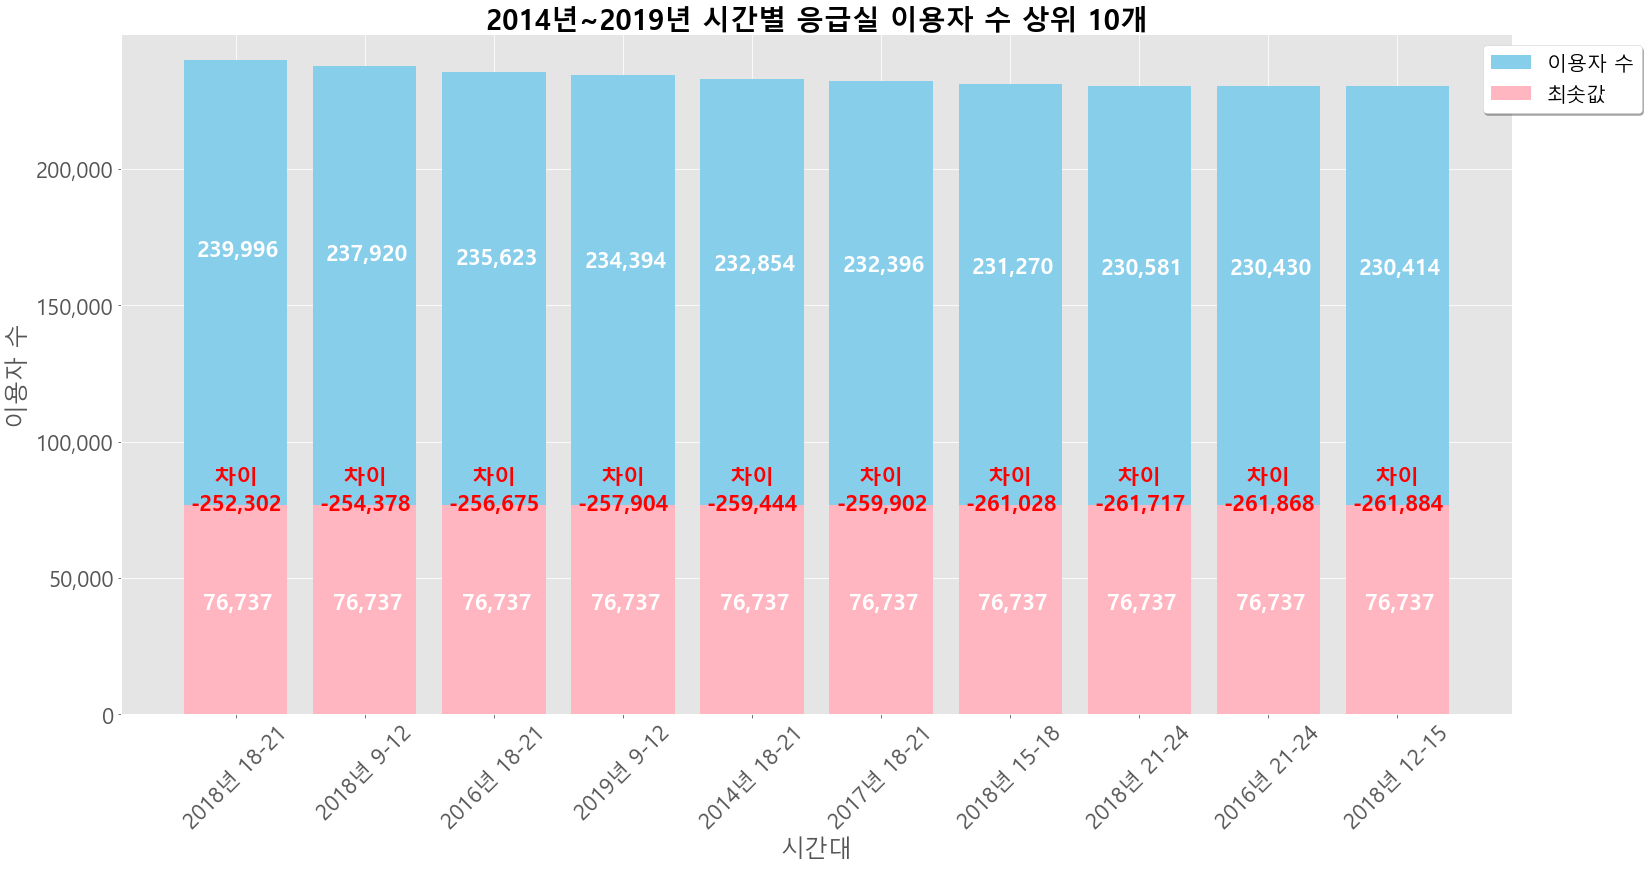

In [347]:
# 그래프 생성
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import font_manager, rc

font = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font)

fig, ax = plt.subplots(figsize=(20, 10))
fig.tight_layout()
fig.set_facecolor('white')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

p1 = plt.bar('period', 'use_num', data=er_top, label='이용자 수', color='skyblue', alpha=1)
p2 = plt.bar('period', 'min', data=er_top, label='최솟값', color='lightpink', alpha=1)

er_min = er_melt['use_num'].min()
for i, v in enumerate(p1):
    width = v.get_width()+i-1.1
    height = v.get_height()*0.7
    ax.text(width-0.05, 75000, '   차이\n'+format(v.get_height()-er_min, ','), color='red', fontsize=22, fontweight='bold')
    ax.text(width, height, format(v.get_height(), ','), color='white', fontsize=22, fontweight='bold')
    
for i, v in enumerate(p2):
    width = v.get_width()+i-1.05
    height = v.get_height()*0.5
    ax.text(width, height, format(v.get_height(), ','), color='white', fontsize=22, fontweight='bold')      

ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(er_top['period'].unique(), fontsize=22, rotation=45)
ax.set_yticks(ax.get_yticks().tolist()) 
ax.set_yticklabels(range(0, 350000, 50000), fontsize=22) 
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ','))) 

plt.ylim(0, 249000)

plt.xlabel('시간대', fontsize=24)
plt.ylabel('이용자 수', fontsize=24)
plt.title('2014년~2019년 시간별 응급실 이용자 수 상위 10개', fontsize=28, fontweight='bold')

plt.legend(loc='best', bbox_to_anchor=(1.1, 1), facecolor='white', framealpha=1, fontsize=20, shadow=True)
plt.show()

6) 연령에 따른 시간별 응급실 이용자 수 차이

In [210]:
# 데이터프레임 생성
import pandas as pd

er_hour = pd.read_csv('c:\\data\\er_hour.csv', encoding='cp949')
er_hour['연령별'].replace('1 - 9세', '01 - 09세', inplace=True)
er_hour['연령별'].replace('1세미만', '00 - 01세', inplace=True)
er_hour.rename(columns={'0-3시':'00-03시', '3-6시':'03-06시', '6-9시':'06-09시', '9-12시':'09-12시'}, inplace=True)

er_sum = er_hour[(~er_hour.연령별.isin(['합계', '연령미상'])) & (er_hour.성별 == '계')]
er_sum = pd.concat([er_sum[er_sum.columns[:2]], er_sum[er_sum.columns[4:]]], axis=1)

er_melt = pd.melt(er_sum, id_vars=['기간', '연령별'], value_vars=er_sum.columns[2:], var_name='hour', value_name='use_num')
er_melt['use_num'].replace(',', '', regex=True, inplace=True)
er_melt['use_num'] = er_melt['use_num'].astype(int)

er_group = er_melt.groupby(['연령별', 'hour']).sum()['use_num'].reset_index()
er_group['rank'] = er_group.groupby(['연령별'])['use_num'].rank(ascending=False).astype(int)
er_group.sort_values(['연령별', 'rank'], inplace=True)

er_rank1 = er_group[er_group['rank']==1]

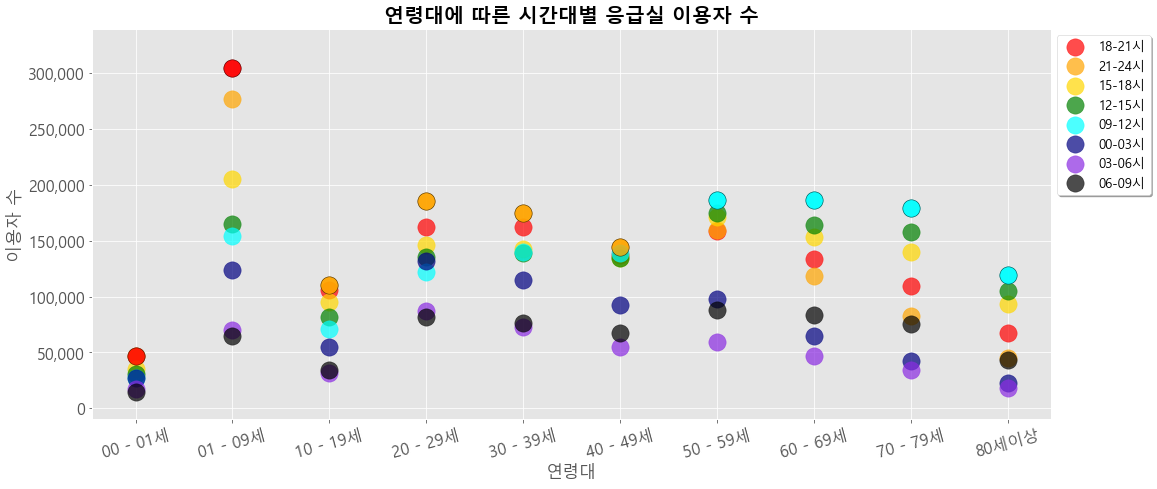

In [211]:
# 그래프 생성
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import font_manager, rc

font = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font)

hour_list = list(er_group.hour.unique())
colors = ['red', 'orange', 'gold', 'green', 'aqua', 'navy', 'blueviolet', 'black']

fig, ax = plt.subplots(figsize=(14, 6))
fig.tight_layout()

for i in range(len(hour_list)):
    plt.scatter('연령별', 'use_num', data=er_group[er_group.hour==hour_list[i]], label=hour_list[i], s=300, color=colors[i], alpha=0.7)

for i in range(len(hour_list)):
    plt.scatter('연령별', 'use_num', data=er_rank1[er_rank1.hour==hour_list[i]], label=None, s=300, color=colors[i], edgecolor='black', alpha=0.8)    

ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(er_group['연령별'].unique(), fontsize=16, rotation=15)
ax.set_yticks(ax.get_yticks().tolist())
ax.set_yticklabels(range(0, 450000, 50000), fontsize=16) 
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.ylim(-10000, 340000)
    
plt.xlabel('연령대', fontsize=17)
plt.ylabel('이용자 수', fontsize=17)
plt.title('연령대에 따른 시간대별 응급실 이용자 수', fontsize=20, fontweight='bold')

plt.legend(loc='best', bbox_to_anchor=(1.11, 1), facecolor='white', framealpha=1, fontsize=13, shadow=True)
plt.style.use('ggplot')
plt.show()

7) 2014년~2019년 시간대별 응급실 이용자 수 합계

In [271]:
# 데이터프레임 생성
import pandas as pd

er_hour = pd.read_csv('c:\\data\\er_hour.csv', encoding='cp949')
er_hour.rename(columns={'0-3시':'00-03시', '3-6시':'03-06시', '6-9시':'06-09시', '9-12시':'09-12시'}, inplace=True)

er_sum = er_hour[(er_day.연령별 == '합계') & (er_day.성별 == '계')]
er_sum = pd.concat([er_sum.기간, er_sum[er_sum.columns[4:]]], axis=1)

er_melt = pd.melt(er_sum, id_vars=['기간'], value_vars=er_sum.columns[1:], var_name='hour', value_name='use_num')
er_melt['use_num'].replace(',', '', regex=True, inplace=True)
er_melt['use_num'] = er_melt['use_num'].astype(int)
er_melt = er_melt.groupby('hour').sum()['use_num'].reset_index()

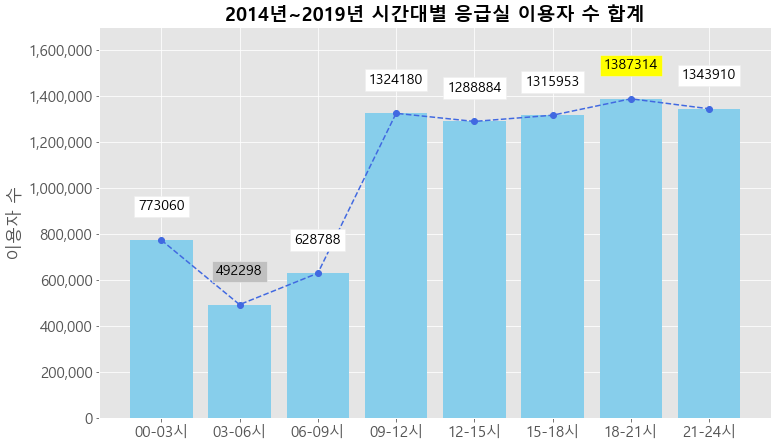

In [384]:
# 그래프 생성
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import font_manager, rc

font = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font)

fig, ax = plt.subplots(figsize=(10, 6))
fig.tight_layout()

plt.bar('hour', 'use_num', data=er_melt, label='이용자 수', color='skyblue', alpha=1)
line_plot = ax.plot('hour', 'use_num', data=er_melt, label='', color='royalblue', linestyle='--', marker='o')  # 선 그래프 출력


for coord in list(line_plot[0].get_xydata()):
    if coord[1] == er_melt['use_num'].max():
        bbox = dict(boxstyle='square', facecolor='yellow')
    elif coord[1] == er_melt['use_num'].min():
        bbox = dict(boxstyle='square', facecolor='silver')
    else: 
        bbox = dict(boxstyle='square', facecolor='white')
        
    ax.text(coord[0], coord[1]+130000, f'{int(coord[1])}', fontsize=14, ha='center', bbox=bbox)  # 선 그래프 텍스트
 
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(er_melt['hour'].unique(), fontsize=15)
ax.set_yticks(ax.get_yticks().tolist()) 
ax.set_yticklabels(range(0, 14000000, 1600000), fontsize=15) 
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.ylim(0, 1700000)

plt.ylabel('이용자 수', fontsize=17)
plt.title('2014년~2019년 시간대별 응급실 이용자 수 합계', fontsize=19, fontweight='bold')

plt.style.use('ggplot')
plt.show()

8) 2014년~2019년 내원사유별 응급실 이용자 수 비율

In [212]:
# 데이터프레임 생성
import pandas as pd

er_reason = pd.read_csv('c:\\data\\er_reason.csv', encoding='cp949', header=None)
er_reason = er_reason.rename(columns=er_reason.iloc[1]).drop(er_reason.index[[0,1]])

er_sum = er_reason[(er_reason.연령별 == '합계') & (er_reason.성별 == '계')]
er_sum = er_sum.iloc[:, [0, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18]]
er_sum.replace(',', '', regex=True, inplace=True)
er_sum[list(er_sum.columns[1:])] = er_sum[list(er_sum.columns[1:])].astype(int)

er_total = er_sum.sum(axis=0).reset_index().drop(0, axis=0)
er_total.columns = ['reason', 'use_num']

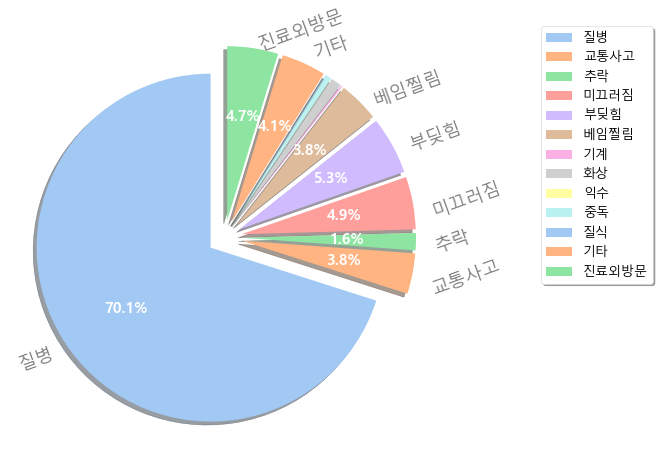

In [213]:
# 그래프 생성
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from matplotlib import font_manager, rc

font = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font)

fig, ax = plt.subplots(figsize=(8, 8))

labels = list(er_total.reason)
sizes = list(er_total.use_num)
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
colors = sns.color_palette('pastel', len(labels))

patches, texts, autotexts = plt.pie(sizes,
                                    explode=explode,
                                    labels=labels,
                                    autopct='%.1f%%',
                                    shadow=True,
                                    startangle=90,
                                    colors=colors)

for label, num in zip(texts, autotexts):
    # label 텍스트에 대한 스타일 적용
    rot = label.get_rotation()
    label.set_rotation(rot+20)

    percent = float(num.get_text()[:-1])
    if percent >= 1.5:
        label.set_color('gray')
        label.set_fontsize(18)
        # pie 위의 텍스트에 대한 스타일 적용
        num.set_color('white')
        num.set_fontsize(15)
        num.set_fontweight('bold')
    else:
        label.set_alpha(0)
        num.set_alpha(0)
  
plt.legend( loc='best', bbox_to_anchor=(1.5, 1), facecolor='white', framealpha=1, fontsize=13, shadow=True)
plt.show()    

9) 성별에 따른 내원사유별 응급실 이용자 수 차이 (질병 제외)

In [361]:
# 데이터프레임 생성
import pandas as pd

er_reason = pd.read_csv('c:\\data\\er_reason.csv', encoding='cp949', header=None)
er_reason = er_reason.rename(columns=er_reason.iloc[1]).drop(er_reason.index[[0,1]])

er_sum = er_reason[(er_reason.연령별 == '합계') & (er_reason.성별 != '계')]
er_sum = er_sum.iloc[:, [0, 2, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18]]
er_sum.replace(',', '', regex=True, inplace=True)
er_sum[list(er_sum.columns[2:])] = er_sum[list(er_sum.columns[2:])].astype(int)

er_man = er_sum[er_sum.성별 == '남자']
er_total_man = er_man.sum(axis=0).reset_index().drop([0,1,2], axis=0)
er_total_man.columns = ['reason', 'use_num']
er_total_man.reset_index(drop=True, inplace=True)

er_woman = er_sum[er_sum.성별 == '여자']
er_total_woman = er_woman.sum(axis=0).reset_index().drop([0,1,2], axis=0)
er_total_woman.columns = ['reason', 'use_num']
er_total_woman.reset_index(drop=True, inplace=True)

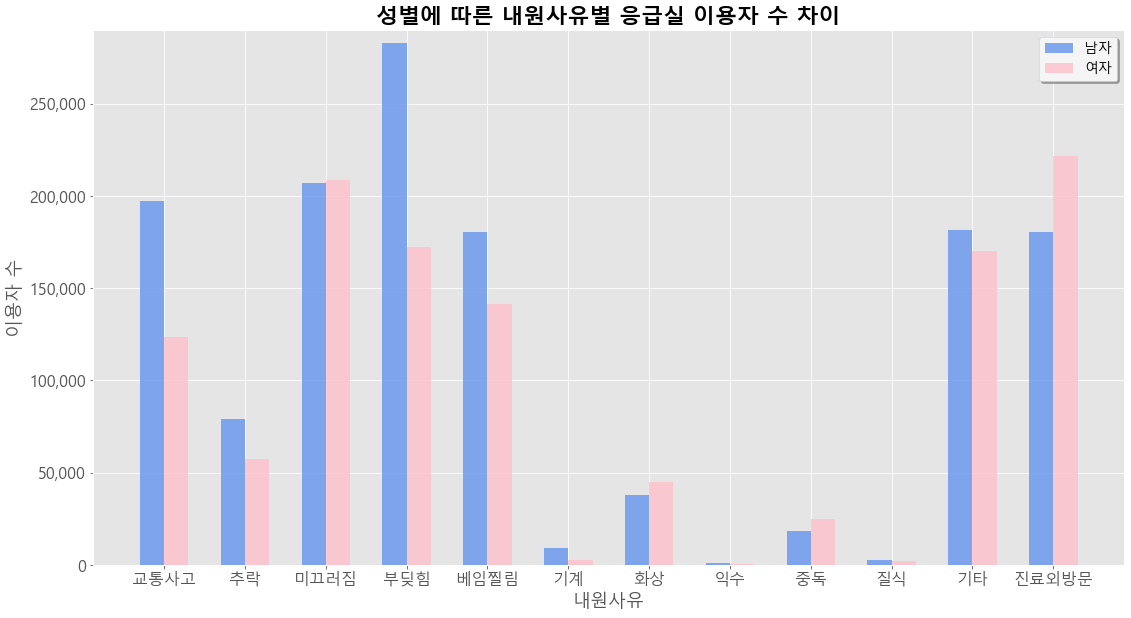

In [386]:
# 그래프 생성
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import font_manager, rc

font = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font)

fig, ax = plt.subplots(figsize=(15, 8))
fig.tight_layout()

x_range = np.arange(len(er_total_woman['reason'].unique()))
bar_width = 0.3

b1 = ax.bar(x_range-bar_width/2, 'use_num', data=er_total_man, label='남자', width=bar_width, color='cornflowerblue', alpha=0.8)
b2 = ax.bar(x_range+bar_width/2, 'use_num', data=er_total_woman, label='여자', width=bar_width, color='pink', alpha=0.8)

ax.set_xticks(x_range)
ax.set_xticklabels(er_total_woman['reason'].unique(), fontsize=16, rotation=0)
ax.set_yticks(ax.get_yticks().tolist()) 
ax.set_yticklabels(range(0, 300000, 45000), fontsize=16) 
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.ylim(0, 290000)

plt.xlabel('내원사유', fontsize=18)
plt.ylabel('이용자 수', fontsize=18)
plt.title('성별에 따른 내원사유별 응급실 이용자 수 차이', fontsize=22, fontweight='bold')

plt.legend(loc='best', bbox_to_anchor=(1, 1), facecolor='whitesmoke', framealpha=1, fontsize=14, shadow=True)
plt.style.use('ggplot')
plt.show()

10) 연령대에 따른 내원사유별 응급실 이용자 수 차이 (질병, 진료외방문 제외)

In [214]:
# 데이터프레임 생성
import pandas as pd

er_reason = pd.read_csv('c:\\data\\er_reason.csv', encoding='cp949')
er_reason = er_reason.rename(columns=er_reason.iloc[0]).drop(er_reason.index[[0,1]])
er_reason2 = er_reason.iloc[1:].replace('1 - 9세', '01 - 09세')
er_reason2 = er_reason.iloc[1:].replace('1세미만', '00 - 01세')

er_sum = er_reason2[(~er_reason2.연령별.isin(['합계', '연령미상'])) & (er_reason2.성별 == '계')]
er_sum = er_sum.iloc[:, [0, 1, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]]
er_sum.replace(',', '', regex=True, inplace=True)
er_sum[list(er_sum.columns[2:])] = er_sum[list(er_sum.columns[2:])].astype(int)

er_melt = pd.melt(er_sum, id_vars=['기간', '연령별'], value_vars=er_sum.columns[2:], var_name='reason', value_name='use_num')
er_group = er_melt.groupby(['연령별', 'reason']).sum()['use_num'].reset_index()
er_group['rank'] = er_group.groupby(['연령별'])['use_num'].rank(ascending=False).astype(int)
er_group.sort_values(['연령별', 'rank'], inplace=True)

er_rank1 = er_group[er_group['rank']==1]

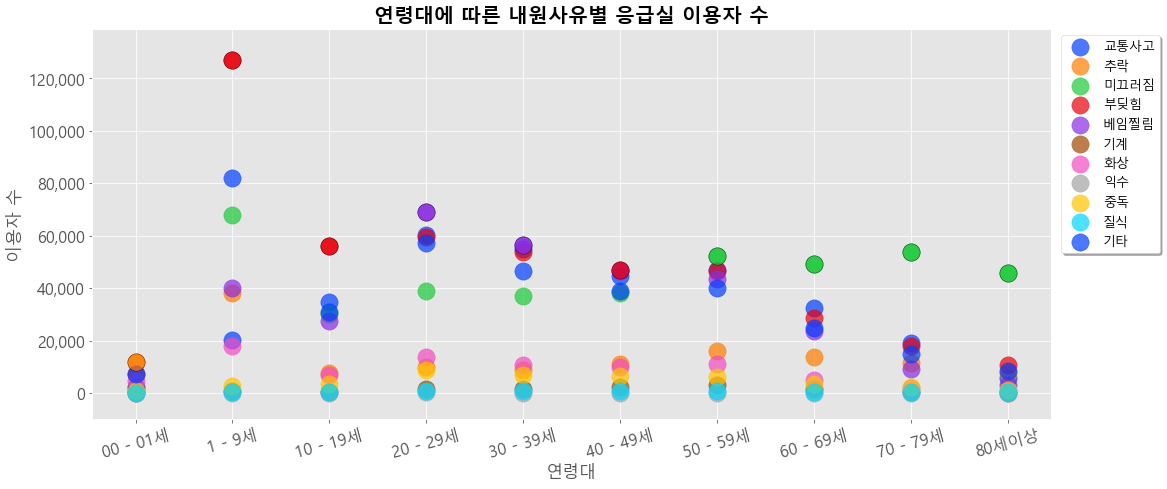

In [215]:
# 그래프 생성
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from matplotlib import font_manager, rc

font = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font)

reason_list= list(er_melt.reason.unique())
colors = sns.color_palette('bright', len(reason_list))

fig, ax = plt.subplots(figsize=(14, 6))
fig.tight_layout()

for i in range(11):
    plt.scatter('연령별', 'use_num', data=er_group[er_group.reason==reason_list[i]], label=reason_list[i], s=300, color=colors[i], alpha=0.7)

for i in range(11):
    plt.scatter('연령별', 'use_num', data=er_rank1[er_rank1.reason==reason_list[i]], label=None, s=300, color=colors[i], edgecolor='black', alpha=0.7)

ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(er_group['연령별'].unique(), fontsize=16, rotation=15)
ax.set_yticks(ax.get_yticks().tolist()) 
ax.set_yticklabels(range(0, 170000, 20000), fontsize=16) 
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.ylim(-10000, 139000)
    
plt.xlabel('연령대', fontsize=17)
plt.ylabel('이용자 수', fontsize=17)
plt.title('연령대에 따른 내원사유별 응급실 이용자 수', fontsize=20, fontweight='bold')

plt.legend(loc='best', bbox_to_anchor=(1.12, 1), facecolor='white', framealpha=1, fontsize=13, shadow=True)
plt.style.use('ggplot')
plt.show()